In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

In [227]:
df_basic = pd.read_csv('bands.csv')
df_basic.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [228]:
# Zamena svih znakova ? 'NaN' vrednostima. U inicijalnom skupu podataka znakom ? oznacene su nedostajuce vrednosti
# Pandas biblioteka znak ? tretira kao regularnu vrednost. Zameniti svako pojavljivanje znaka ? sa 'NaN'
df_basic.replace({'?': np.nan}, inplace=True)


%matplotlib inline

### Ispitivanje konzistentnosti vrednosti u okviru kategoričkih atributa, kao i formatiranje vrednosti

- Nekonzistentne vrednosti su vrednosti kojima nije mesto u odgovarajućim kolonama u kojima se nalaze

- Loše formatirane vrednosti dovode do toga da **pandas DataFrame** tretira istu vrednost kao veći broj različitih vrednosti

In [229]:
df_basic['cylinder_number'].unique()

array(['X126', 'X266', 'B7', 'T133', 'J34', 'T218', 'X249', 'X788',
       'M372', 'I320', 'I337', 'X352', 'X67', 'X817', 'X273', 'F108',
       'F237', 'F267', 'S21', 'F492', 'X799', 'X823', 'X163', 'O4', 'E84',
       'E81', 'E72', 'E310', 'X29', 'X292', 'J9', 'J582', 'X141', 'X818',
       'V376', 'M254', 'R5', 'J33', 'J43', 'I357', 'I353', 'X291', 'X129',
       'X297', 'X146', 'E303', 'E68', 'J42', 'X53', 'X821', 'X118',
       'X826', 'R23', 'I354', 'I358', 'X760', 'E26', 'E69', 'E77', 'E83',
       'E67', 'X791', 'E90', 'X271', 'F308', 'T281', 'F067', 'X405',
       'E91', 'F615', 'F510', 'F670', 'M402', 'X18', 'F310', 'F72',
       'X308', 'X720', 'G404', 'X798', 'X160', 'G416', 'X350', 'X264',
       'X838', 'X89', 'X102', 'X830', 'X35', 'X390', 'X754', 'O2', '3',
       'F103', 'S180', 'O8', 'G608', 'F416', 'R14', 'X746', 'X195',
       'M337', 'T32', 'M410', 'E510', 'G108', 'G145', 'X356', 'G95',
       'X802', 'X779', 'T380', 'F146', 'X9', 'X21', 'X220', 'X147', 'E92',
    

In [230]:
df_basic['customer'].unique()

array(['TVGUIDE', 'MODMAT', 'MASSEY', 'KMART', 'ROSES', 'CHILDCRAFT',
       'HANOVRHOUSE', 'HANOVRHOUS', 'GUIDEPOSTS', 'HOMESHOP', 'USCAV',
       'COLORTIL', 'WARDS', 'TARGET', 'WOOLWORTH', 'AMES', 'WOOLWRTH',
       'ABBYPRESS', 'BELKS', 'SEARS', 'JCPENNY', 'CENPURCH', 'BELK',
       'TOYSRUS', 'ECKERD', 'JCP', 'COLORTILE', 'BESTPROD', 'HANHOUSE',
       'HILLS', 'SHEPLERS', 'HANOVERHOUSE', 'AUSTADS', 'NATLWILDLIFE',
       'JAMESWAY', 'BURDINES', 'EXXON', 'HOMESHOPPING', 'NTLWILDLIFE',
       'CHILDWORLD', 'DOWNS', 'GLOBAL', 'CASUALLIVING', 'CAMPINGWORLD',
       'OLDVILLAGESHOP', 'GLOBALEQUP', 'YIELDHOUSE', 'REI', 'ECKERDS',
       'WALMART', 'DUNNS', 'MERVYNS', 'LAZARUS', 'GALLS',
       'COMPETITIVEDGE', 'CASLIVING', 'BRENDLS', 'SERVMERCH', 'LURIAS',
       'ABBEYPRESS', 'HANOVERHSE', 'ABBEY', 'GURNEY', 'ADCO', 'KIDSRUS',
       'PENNEY', 'CVS', 'homeshop', 'kmart', 'hanoverhouse',
       'homeshopping', 'bestprod', 'venture', 'modmat', 'target', 'jfk',
       'colorfulimage', '

In [231]:
df_basic['customer'].unique()

array(['TVGUIDE', 'MODMAT', 'MASSEY', 'KMART', 'ROSES', 'CHILDCRAFT',
       'HANOVRHOUSE', 'HANOVRHOUS', 'GUIDEPOSTS', 'HOMESHOP', 'USCAV',
       'COLORTIL', 'WARDS', 'TARGET', 'WOOLWORTH', 'AMES', 'WOOLWRTH',
       'ABBYPRESS', 'BELKS', 'SEARS', 'JCPENNY', 'CENPURCH', 'BELK',
       'TOYSRUS', 'ECKERD', 'JCP', 'COLORTILE', 'BESTPROD', 'HANHOUSE',
       'HILLS', 'SHEPLERS', 'HANOVERHOUSE', 'AUSTADS', 'NATLWILDLIFE',
       'JAMESWAY', 'BURDINES', 'EXXON', 'HOMESHOPPING', 'NTLWILDLIFE',
       'CHILDWORLD', 'DOWNS', 'GLOBAL', 'CASUALLIVING', 'CAMPINGWORLD',
       'OLDVILLAGESHOP', 'GLOBALEQUP', 'YIELDHOUSE', 'REI', 'ECKERDS',
       'WALMART', 'DUNNS', 'MERVYNS', 'LAZARUS', 'GALLS',
       'COMPETITIVEDGE', 'CASLIVING', 'BRENDLS', 'SERVMERCH', 'LURIAS',
       'ABBEYPRESS', 'HANOVERHSE', 'ABBEY', 'GURNEY', 'ADCO', 'KIDSRUS',
       'PENNEY', 'CVS', 'homeshop', 'kmart', 'hanoverhouse',
       'homeshopping', 'bestprod', 'venture', 'modmat', 'target', 'jfk',
       'colorfulimage', '

In [232]:
df_basic['job_number'].unique()

array(['25503', '47201', '39039', '37351', '38039', '35751', '37000',
       '35539', '23052', '38064', '35521', '37571', '37340', '35816',
       '37352', '37080', '37157', '25507', '27490', '35811', '35334',
       '37869', '35752', '35794', '37441', '37354', '35335', '37335',
       '35870', '25509', '37386', '27386', '37254', '35457', '47202',
       '37163', '37355', '35753', '25513', '38051', '25514', '25515',
       '37081', '35534', '35754', '37572', '35814', '37822', '35458',
       '47203', '23055', '25520', '35982', '35872', '37168', '37333',
       '25517', '37994', '35871', '37169', '47169', '32360', '25519',
       '35460', '37365', '37338', '37758', '35758', '37915', '37305',
       '37501', '37177', '35759', '37579', '37502', '37938', '35528',
       '37199', '37003', '37990', '47204', '37505', '47103', '34402',
       '34545', '36053', '36859', '34683', '36648', '34664', '36858',
       '25416', '34546', '36054', '34752', '36928', '25424', '34093',
       '36649', '345

<AxesSubplot:xlabel='grain_screened', ylabel='count'>

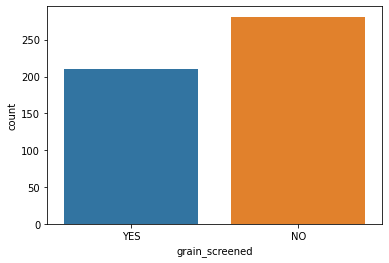

In [233]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'grain_screened'

df_basic['grain_screened'].unique()
df_basic['grain_screened'].replace({'45': np.nan}, inplace=True)
sns.countplot(x='grain_screened', data=df_basic)

<AxesSubplot:xlabel='proof_on_ctd_ink', ylabel='count'>

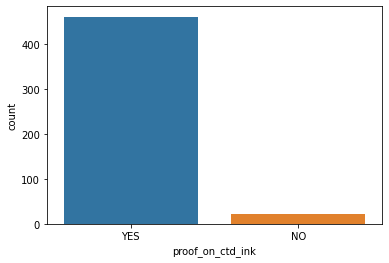

In [234]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'proof_on_ctd_ink'

df_basic['proof_on_ctd_ink'].unique()
df_basic['proof_on_ctd_ink'].replace({'17': np.nan}, inplace=True)
sns.countplot(x='proof_on_ctd_ink', data=df_basic)

<AxesSubplot:xlabel='blade_mfg', ylabel='count'>

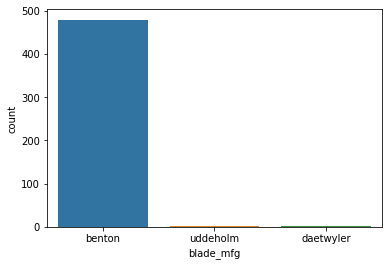

In [235]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'blade_mfg' 

df_basic['blade_mfg'].unique()
df_basic['blade_mfg'].replace({'BENTON': 'benton', 'UDDEHOLM': 'uddeholm', '84': 'daetwyler'}, inplace=True)
sns.countplot(x='blade_mfg', data=df_basic)

In [236]:
df_basic['cylinder_division'].unique()
df_basic.drop('cylinder_division', axis=1, inplace=True)
df_basic.drop('ink_color', axis=1, inplace=True)

<AxesSubplot:xlabel='paper_type', ylabel='count'>

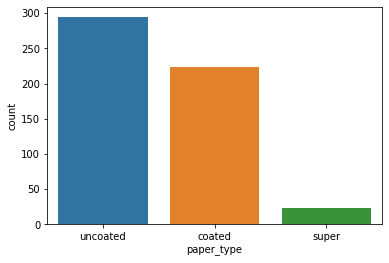

In [237]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive

df_basic['paper_type'].unique()
df_basic['paper_type'].replace({'UNCOATED': 'uncoated', 'COATED': 'coated', '27': np.nan}, inplace=True)
sns.countplot(x='paper_type', data=df_basic)

<AxesSubplot:xlabel='ink_type', ylabel='count'>

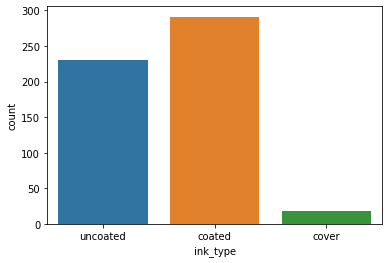

In [238]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'ink_type'

df_basic['ink_type'].unique()
df_basic['ink_type'].replace({'UNCOATED': 'uncoated', 'COATED': 'coated', 'COVER': 'cover'}, inplace=True)
sns.countplot(x='ink_type', data=df_basic)

<AxesSubplot:xlabel='direct_steam', ylabel='count'>

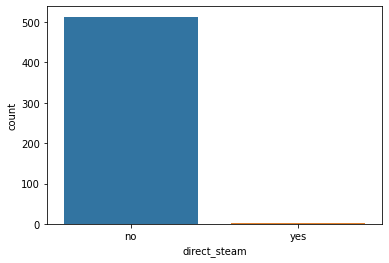

In [239]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'direct_steam'

df_basic['direct_steam'].unique()
df_basic['direct_steam'].replace(
    {'YES': 'yes', 'NO': 'no', '1865': np.nan}, inplace=True)
sns.countplot(x='direct_steam', data=df_basic)

<AxesSubplot:xlabel='solvent_type', ylabel='count'>

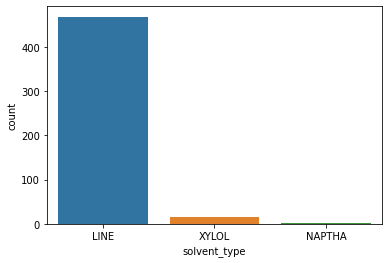

In [240]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'solvent_type'

df_basic['solvent_type'].unique()
sns.countplot(x='solvent_type', data=df_basic)

# Promenljiva 'solvent_type' ne sadrzi nekonzistentne i lose formatirane vrednosti

<AxesSubplot:xlabel='type_on_cylinder', ylabel='count'>

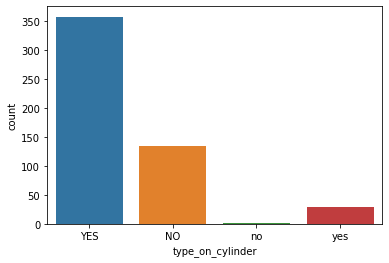

In [241]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'type_on_cylinder'

df_basic['type_on_cylinder'].unique()
sns.countplot(x='type_on_cylinder', data=df_basic)

# Promenljiva 'type_on_cylinder' ne sadrzi nekonzistentne i lose formatirane vrednosti

<AxesSubplot:xlabel='press_type', ylabel='count'>

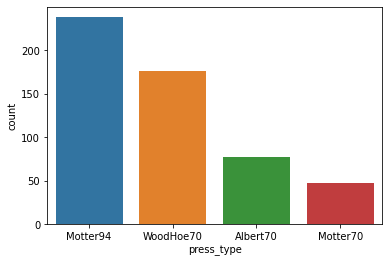

In [242]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'press_type'

df_basic['press_type'].unique()
sns.countplot(x='press_type', data=df_basic)

# Promenljiva 'press_type' ne sadrzi nekonzistentne i lose formatirane vrednosti

<AxesSubplot:xlabel='press', ylabel='count'>

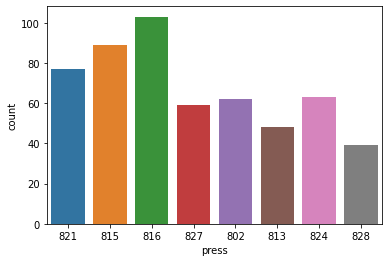

In [243]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'press'

df_basic['press'].unique()
sns.countplot(x='press', data=df_basic)

# Promenljiva 'press' ne sadrzi nekonzistentne i lose formatirane vrednosti

<AxesSubplot:xlabel='unit_number', ylabel='count'>

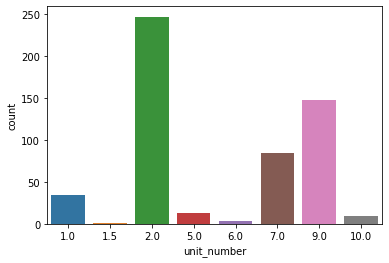

In [244]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'unit_number'

df_basic['unit_number'].unique()
sns.countplot(x='unit_number', data=df_basic)

# Promenljiva 'unit_number' ne sadrzi nekonzistentne i lose formatirane vrednosti

<AxesSubplot:xlabel='cylinder_size', ylabel='count'>

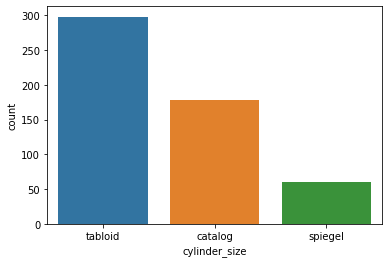

In [245]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'cylinder_size'

df_basic['cylinder_size'].unique()
df_basic['cylinder_size'].replace({'TABLOID': 'tabloid', 'CATALOG': 'catalog',
                             'SPIEGEL': 'spiegel', 'nan': np.nan, '0.7': np.nan}, inplace=True)
sns.countplot(x='cylinder_size', data=df_basic)

<AxesSubplot:xlabel='paper_mill_location', ylabel='count'>

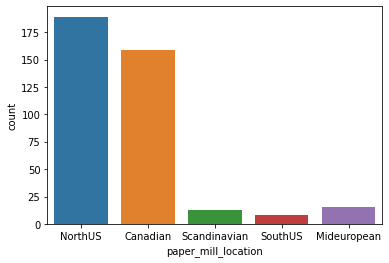

In [246]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'paper_mill_location'

df_basic['paper_mill_location'].unique()
df_basic['paper_mill_location'].replace(
    {'CANAdiAN': 'Canadian', 'CANADIAN': 'Canadian', 'SCANDANAVIAN': 'Scandinavian', 'mideuropean': 'Mideuropean'}, inplace=True)
sns.countplot(x='paper_mill_location', data=df_basic)

<AxesSubplot:xlabel='plating_tank', ylabel='count'>

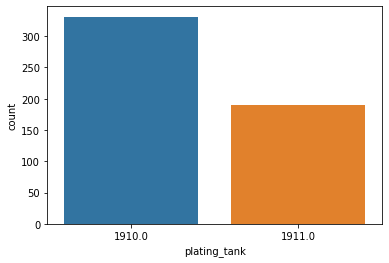

In [247]:
# Ciscenje nekonzistentnih vrednosti i resavanje problema lose formatiranih vrednosti promenljive 'plating_tank'

df_basic['plating_tank'].unique()
df_basic['plating_tank'].replace({'nan': 'NaN', '40': np.nan}, inplace=True)
sns.countplot(x='plating_tank', data=df_basic)

### Rešavanje problema nekonzistentnih vrednosti u okviru kontinualnih promenljivih, a zatim i konvertovanje svih numeričkih kolona u float tip

In [248]:
# Funkcija koja vrsi konvertovanje pandas kolona u zeljeni tip

def convert_dataframe_variables_into_wanted_type(df, list_of_variables, wanted_type):

    for variable in list_of_variables:
        df[variable] = df[variable].astype(wanted_type)

In [249]:
# Resavanje problema nekonzistentnih vrednosti u okviru numerickih promenljivih

# Zameni vrednost 'band' iz caliper promenljive sa NaN
df_basic['caliper'].replace({'band': np.nan}, inplace=True)

# timestamp numericka promenljiva sadrzi 'tabloid' vrednost... zameni je sa NaN
df_basic['timestamp'].replace({'tabloid': np.nan}, inplace=True)

# Konvertovanje numerickih promenljivih u float tip (pandas DataFrame ih tretira kao object)
convert_dataframe_variables_into_wanted_type(
    df_basic, ['timestamp', 'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer', 'current_density', 'anode_space_ratio', 'chrome_content'], float)

<AxesSubplot:>

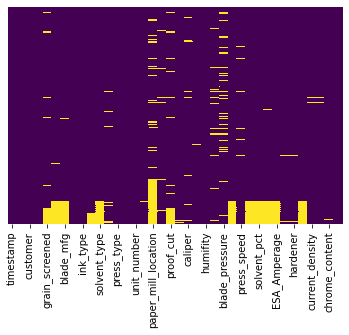

In [250]:
# Graficki prikaz nedostajucih vrednosti u celokupnom skupu podataka

sns.heatmap(df_basic.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [251]:
# Procenat nedostajucih vrednosti svake promenljive individualno, izrazen u procentima

df_basic.isnull().mean().sort_values(ascending=False)

paper_mill_location    0.290203
blade_pressure         0.120148
blade_mfg              0.110906
proof_on_ctd_ink       0.107209
ESA_Voltage            0.107209
varnish_pct            0.105360
solvent_pct            0.105360
ink_pct                0.105360
solvent_type           0.103512
roller_durometer       0.103512
ESA_Amperage           0.103512
proof_cut              0.101664
grain_screened         0.092421
roughness              0.059150
caliper                0.053604
direct_steam           0.048059
plating_tank           0.036969
type_on_cylinder       0.035120
press_speed            0.022181
hardener               0.016636
current_density        0.016636
anode_space_ratio      0.016636
wax                    0.014787
viscosity              0.011091
chrome_content         0.009242
cylinder_size          0.009242
ink_temperature        0.007394
humifity               0.005545
band_type              0.003697
ink_type               0.001848
paper_type             0.001848
press_ty

band: 0.4195933456561922
noband: 0.5767097966728281


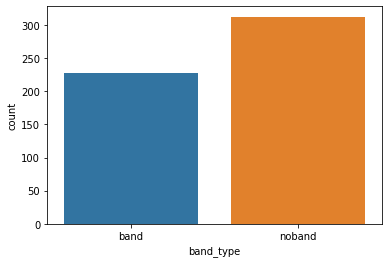

In [252]:
# Odnos stampaca sa pokrivljenim cilindrom ('band') i stampaca sa ispravnim cilindrom ('noband')
# ...u cilju ispitivanja izbalansiranosti skupa...

sns.countplot(x='band_type', data=df_basic)

print('band:', len(df_basic.loc[df_basic['band_type'] == 'band']) / len(df_basic))
print('noband:', len(df_basic.loc[df_basic['band_type'] == 'noband']) / len(df_basic))

### Sledi istraživačka analiza podataka, koja ima za cilj da utvrdi koji su se štampači najviše kvarili (tačnije koji se tip štampača najviše puta javljao sa pokrivljenim cilindrom), kao i pokušaj utvrđivanja razloga krivljenja cilindara.

<AxesSubplot:xlabel='band_type', ylabel='count'>

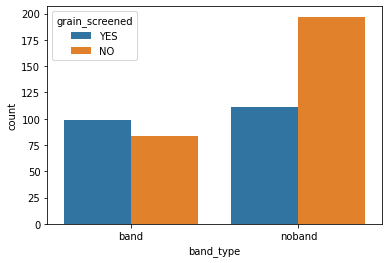

In [253]:
sns.countplot(x='band_type', hue='grain_screened',
              data=df_basic.loc[df_basic['grain_screened'].notna()])

Iz gornjeg bar grafika možemo da vidimo da je najveći broj štampača sa pokrivljenim cilindrom za vrednost atributa **'grain_screened'** imao **'YES'**, kao i da je štampača (**grain_screened='YES'**) bilo najmanje u kategoriji štampača koji se nisu kvarili

<AxesSubplot:xlabel='grain_screened', ylabel='count'>

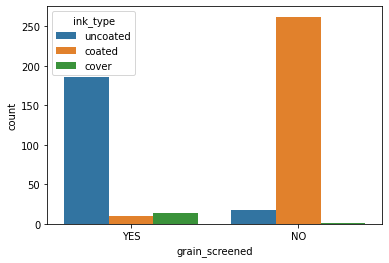

In [254]:
sns.countplot(x='grain_screened', hue='ink_type',
              data=df_basic.loc[df_basic['grain_screened'].notna()])

Štampaci koji za atribut **'grain_screened'** imaju vrednost **'YES'** (oni sa najviše pokrivljenih cilindara), u najvećoj meri su koristili mastilo sa vrednošću **'uncoated'**, dok su u najmanjoj meri koristili mastilo sa vrednošću **'coated'**. Isto tako, možemo da vidimo da su štampači koji su za atribut **'grain_screened'** imali vrednost **'NO'** (štampači sa najmanje pokrivljenih cilindara), najviše koristili upravo **'coated'** mastilo.
Jedan od predloga može biti: zameniti **'uncoated'** mastilo **'coated'** mastilom.

<AxesSubplot:xlabel='grain_screened', ylabel='count'>

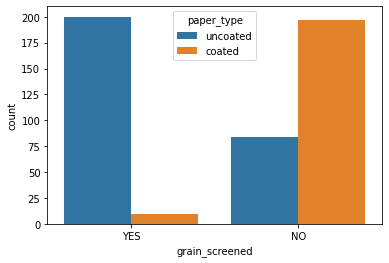

In [255]:
sns.countplot(x='grain_screened', hue='paper_type',
              data=df_basic.loc[df_basic['grain_screened'].notna()])

Što se tice papira koji su štampači koristili, iz gornjeg grafika možemo da uvidimo sledeće:

  -Štampači koji za atribut **'grain_screened'** imaju vrednost **'YES'** (štampači sa najvećim brojem pokrivljenih cilindara), najviše su koristili **'uncoated'** tip papira, dok su u najmanjoj meri koristili **'coated'** papir
  
  -Štampaci koji za atribut **'grain_screened'** imalju vrednost **'NO'** (štampači sa najmanjim brojem pokrivljenih cilindara), u najvećoj meri su koristili **'coated'** tip papira
    
Predlog: Zameniti **'uncoated'** papir **'coated'** papirom

In [256]:
print('Median vremena rada štampača: ', df_basic.pivot_table(
    index='grain_screened', values='timestamp', aggfunc='median'))

Median vremena rada štampača:                   timestamp
grain_screened            
NO              19910206.0
YES             19901207.0


In [257]:
print('Srednja vrednost vremena rada štampača: ', df_basic.pivot_table(
    index='grain_screened', values='timestamp', aggfunc='mean'))

Srednja vrednost vremena rada štampača:                     timestamp
grain_screened              
NO              1.990677e+07
YES             1.990516e+07


### Rešavanje problema nedostajućih vrednosti

In [258]:
# Implementacija funkcije koja vrsi zamenu svih NaN vrednosti modom (vrednoscu koja se javlja najveci broj puta u okviru neke promenljive)

def replace_nan_with_most_frequent_value_categorical(df, list_of_variables):

    for variable in list_of_variables:
        df[variable].fillna(df[variable].mode()[0], inplace=True)

In [259]:
# Zamena NaN vrednosti kategorickih atributa najfrekventnijom vrednoscu

replace_nan_with_most_frequent_value_categorical(
    df_basic, ['cylinder_number', 'job_number', 'grain_screened', 'proof_on_ctd_ink', 'blade_mfg', 'ink_type', 'direct_steam', 'solvent_type', 'type_on_cylinder', 'press_type', 'press', 'cylinder_size', 'paper_mill_location', 'plating_tank', 'band_type', 'paper_type'])

In [260]:
# Kodirati sve kategoricke promenljice sa dve klase koriscenjem LabelEncoder-a

label_encoder = LabelEncoder()
grain_screened_encoded = label_encoder.fit_transform(
    df_basic['grain_screened'])
proof_on_ctd_ink_encoded = label_encoder.fit_transform(
    df_basic['proof_on_ctd_ink'])
direct_steam_encoded = label_encoder.fit_transform(df_basic['direct_steam'])
plating_tank_encoded = label_encoder.fit_transform(df_basic['plating_tank'])
band_type_encoded = np.where(df_basic['band_type'] == 'band', 1, 0)
band_type_save = df_basic['band_type']

In [261]:
# One hot encoding za sve nominalne kategoricke promenljive koje imaju vise od dve razlicite vrednosti

one_hot_encoded_columns = pd.get_dummies(
    df_basic[['paper_type', 'cylinder_number', 'customer', 'job_number', 'blade_mfg', 'paper_type', 'ink_type', 'solvent_type',
              'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location']], drop_first=True)

df_basic = pd.concat([df_basic, one_hot_encoded_columns], axis=1)

In [262]:
# Zamena originalnih kategorickih promenljivih sa dve razlicite labele novim, kodiranim vrednostima

df_basic['grain_screened'] = grain_screened_encoded
df_basic['proof_on_ctd_ink'] = proof_on_ctd_ink_encoded
df_basic['direct_steam'] = direct_steam_encoded
df_basic['plating_tank'] = plating_tank_encoded
df_basic['band_type'] = band_type_encoded

In [263]:
# Odbacivanje originalnih kategorickih kolona

df_basic.drop(columns=['paper_type', 'cylinder_number', 'customer', 'job_number', 'blade_mfg', 'paper_type', 'ink_type', 'solvent_type',
                       'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'grain_screened',
                       'proof_on_ctd_ink', 'direct_steam', 'plating_tank'], inplace=True)

In [264]:
# snimanje osnovnog data-frame-a

df_basic.to_csv('bands_basic.csv', index=False)

In [265]:
# Funkcija koja vrsi zamenu NaN vrednosti zeljenom taktikom (mean, median ili random_sample)

def impute_value(df, variable, method):

    if method == 'mean':
        df[variable + '_mean'] = df[variable].fillna(df[variable].mean())
    elif method == 'median':
        df[variable + '_median'] = df[variable].fillna(df[variable].median())
    else:
        df[variable + '_random_sample'] = df[variable]
        random_sample = df[variable].dropna().sample(
            df[variable].isna().sum(), random_state=0)
        random_sample.index = df.loc[df[variable].isna()].index
        df.loc[df[variable].isna(), variable + '_random_sample'] = random_sample

In [266]:
# Zamena svih NaN vrednosti kontinualnih promenljivih srednjom vrednoscu u osnovnom dataframe-u

for column in ['timestamp', 'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer', 'current_density', 'anode_space_ratio', 'chrome_content']:
    impute_value(df_basic, column, 'mean')

df_basic.drop(columns=['timestamp', 'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 'ink_pct',
                       'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer', 'current_density', 'anode_space_ratio', 'chrome_content'], inplace=True)

### Predikcija NaN vrednsti kontinualnih promenljivih vrednostima koje vrše najmanju distorziju standardne devijacije u odnosu na originalne vrednosti
- Pre zamene **NaN** vrednosti kontinualnih promenljivih, korisno je ispitati da li se javljaju **outlieri** u svakoj promenljivoj individualno
- **Outlieri** u velikoj meri utiču na to kako treba vršiti zamenu **NaN** vrednosti (jer u velikoj meri utiču na srednju vrednost, dok je median robustan u odnosu na **outliere**)
- Najpre, pomoću **box** grafika prikazati distribuciju svake kontinualne promenljive po kvartalima (ovakav graficki prikaz je zgodan zato što biblioteke za vizuelizaciju ovom prilikom koriste **IQR** algoritam za detekciju elemenata van granica i prikazuju ih iznad 'gornjeg brka' i 'donjeg brka') **box** grafika.

In [267]:
# osnovni dataframe (df_basic) do sada sadrzi ispravku nekonzistentnih i lose formatiranih vrednosti, 
# kodirane vrednosti kategorickih promenljivih, zamenjene NaN vrednosti kategorickih promenljivih njihovim modom
# kao i zamenjene NaN vrednosti kontinualnih promenljivih srednjom vrednoscu
# Stoga, najpre treba ucitati dataframe koji jos uvek ne sadrzi zamenjene NaN vrednosti kontinualnih promenljivih

df_best_deviation_imputation = pd.read_csv('bands_basic.csv')


In [268]:
# Funkcija koja vrsi vizuelni prikaz gustina verovatnoca promenljive pre zamene NaN vrednosti...
# ... , promenljive nakon zamene vrednosti medianom, kao i promenljive nakon zamene vrednosti random sample-om

def compare_kde_visualy(df, variable):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[variable].plot(kind='kde', ax=ax, color='green')
    df[variable + '_median'].plot(kind='kde', ax=ax, color='red')
    df[variable + '_random_sample'].plot(kind='kde', ax=ax, color='blue')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [269]:
# Funkcija koja po apsolutnoj vrednosti vrsi uporedjenje standardnih devijacija originalne kolone (koja sagrzi NaN vrednosti)...
# ... sa kolonom nakon zamene NaN vrednosti
# Cilj je zameniti originalnu kolonu koja sadrzi NaN vrednosti kolonom koja nakon zamene NaN vrednosti...
# pokaze najmanju promenu standardne devijacije

def compare_median_and_random_sample(df, variable):

    impute_value(df, variable, 'median')
    impute_value(df, variable, 'random_sample')

    print(variable + ' i ' + variable  + '_median razlika standardnih devijacija: ',
          abs(df[variable].std() - df[variable + '_median'].std()))
    print(variable + ' i ' + variable + '_random_sample razlika standardnih devijacija: ',
          abs(df[variable].std() - df[variable + '_random_sample'].std()))

<AxesSubplot:>

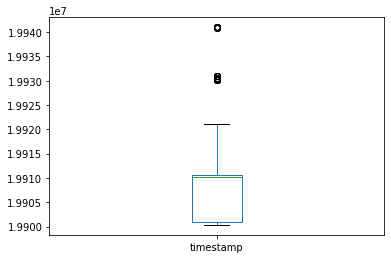

In [270]:
df_best_deviation_imputation['timestamp'].plot(kind='box')

timestamp i timestamp_median razlika standardnih devijacija:  7.312027146432229
timestamp i timestamp_random_sample razlika standardnih devijacija:  7.212572694075789


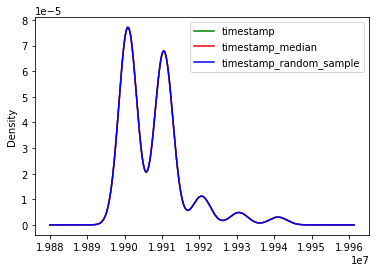

In [271]:
compare_median_and_random_sample(df_best_deviation_imputation, 'timestamp')
compare_kde_visualy(df_best_deviation_imputation, 'timestamp')

In [272]:
df_best_deviation_imputation.drop(columns=['timestamp', 'timestamp_median'], inplace=True)

<AxesSubplot:>

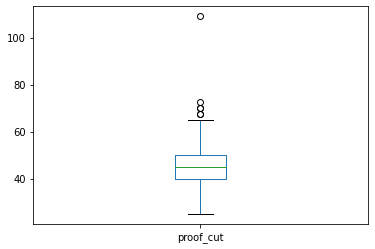

In [273]:
df_best_deviation_imputation['proof_cut'].plot(kind='box')

proof_cut i proof_cut_median razlika standardnih devijacija:  0.4961516734806892
proof_cut i proof_cut_random_sample razlika standardnih devijacija:  0.05068187435069227


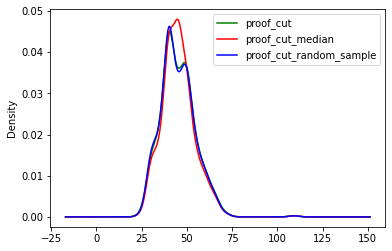

In [274]:
compare_median_and_random_sample(df_best_deviation_imputation, 'proof_cut')
compare_kde_visualy(df_best_deviation_imputation, 'proof_cut')

In [275]:
df_best_deviation_imputation.drop(columns=['proof_cut', 'proof_cut_median'], inplace=True)

<AxesSubplot:>

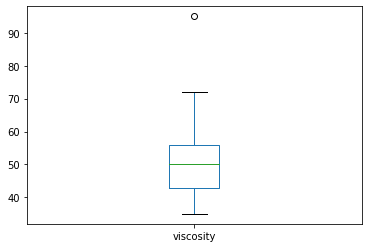

In [276]:
df_best_deviation_imputation['viscosity'].plot(kind='box')

viscosity i viscosity_median razlika standardnih devijacija:  0.04538126710941093
viscosity i viscosity_random_sample razlika standardnih devijacija:  0.011391410778264444


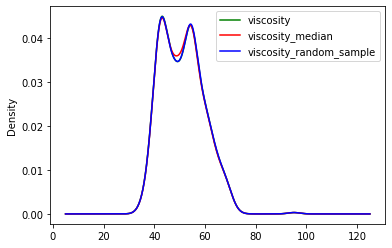

In [277]:
compare_median_and_random_sample(df_best_deviation_imputation, 'viscosity')
compare_kde_visualy(df_best_deviation_imputation, 'viscosity')

In [278]:
df_best_deviation_imputation.drop(columns=['viscosity', 'viscosity_median'], inplace=True)

<AxesSubplot:>

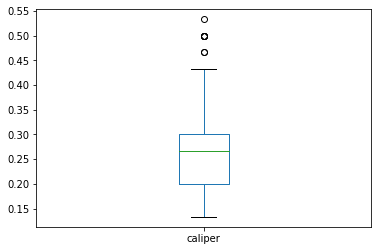

In [279]:
df_best_deviation_imputation['caliper'].plot(kind='box')

caliper i caliper_median razlika standardnih devijacija:  0.0018617496861064453
caliper i caliper_random_sample razlika standardnih devijacija:  0.00015241347630003121


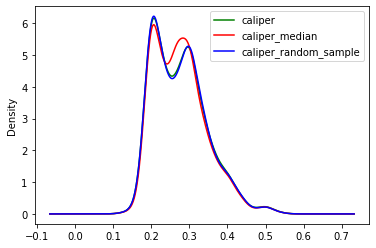

In [280]:
compare_median_and_random_sample(df_best_deviation_imputation, 'caliper')
compare_kde_visualy(df_best_deviation_imputation, 'caliper')

In [281]:
df_best_deviation_imputation.drop(columns=['caliper', 'caliper_median'], inplace=True)

<AxesSubplot:>

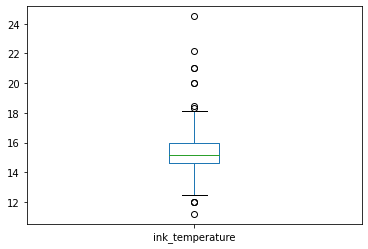

In [282]:
df_best_deviation_imputation['ink_temperature'].plot(kind='box')

ink_temperature i ink_temperature_median razlika standardnih devijacija:  0.004668381222093565
ink_temperature i ink_temperature_random_sample razlika standardnih devijacija:  0.0039583755777452545


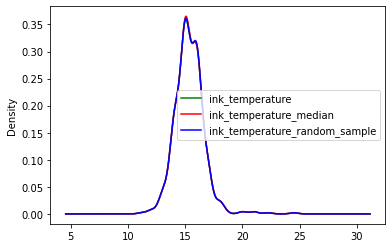

In [283]:
compare_median_and_random_sample(df_best_deviation_imputation, 'ink_temperature')
compare_kde_visualy(df_best_deviation_imputation, 'ink_temperature')

In [284]:
df_best_deviation_imputation.drop(columns=['ink_temperature', 'ink_temperature_median'], inplace=True)

<AxesSubplot:>

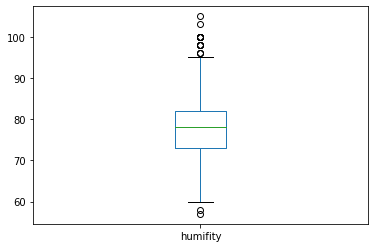

In [285]:
df_best_deviation_imputation['humifity'].plot(kind='box')

humifity i humifity_median razlika standardnih devijacija:  0.021410921665663274
humifity i humifity_random_sample razlika standardnih devijacija:  0.008352913994765565


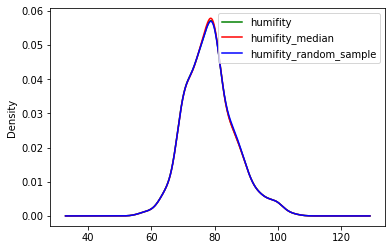

In [286]:
compare_median_and_random_sample(df_best_deviation_imputation, 'humifity')
compare_kde_visualy(df_best_deviation_imputation, 'humifity')

In [287]:
df_best_deviation_imputation.drop(columns=['humifity', 'humifity_median'], inplace=True)

<AxesSubplot:>

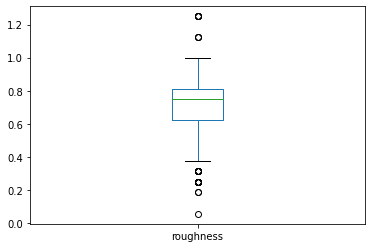

In [288]:
df_best_deviation_imputation['roughness'].plot(kind='box')

In [289]:
compare_median_and_random_sample(df_best_deviation_imputation, 'roughness')

roughness i roughness_median razlika standardnih devijacija:  0.005723200345003676
roughness i roughness_random_sample razlika standardnih devijacija:  0.0014494497086474378


roughness i roughness_median razlika standardnih devijacija:  0.005723200345003676
roughness i roughness_random_sample razlika standardnih devijacija:  0.0014494497086474378


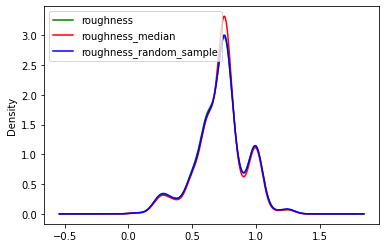

In [290]:
compare_median_and_random_sample(df_best_deviation_imputation, 'roughness')
compare_kde_visualy(df_best_deviation_imputation, 'roughness')

In [291]:
df_best_deviation_imputation.drop(columns=['roughness', 'roughness_median'], inplace=True)

<AxesSubplot:>

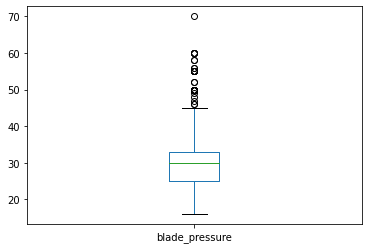

In [292]:
df_best_deviation_imputation['blade_pressure'].plot(kind='box')

blade_pressure i blade_pressure_median razlika standardnih devijacija:  0.561602093378406
blade_pressure i blade_pressure_random_sample razlika standardnih devijacija:  0.03510048616793071


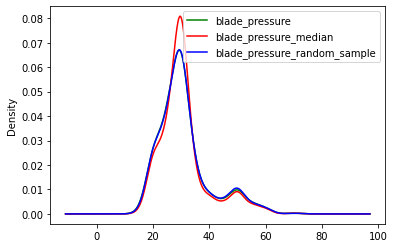

In [293]:
compare_median_and_random_sample(df_best_deviation_imputation, 'blade_pressure')
compare_kde_visualy(df_best_deviation_imputation, 'blade_pressure')

In [294]:
df_best_deviation_imputation.drop(columns=['blade_pressure', 'blade_pressure_median'], inplace=True)

<AxesSubplot:>

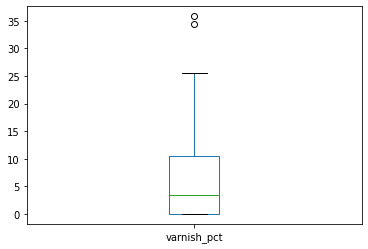

In [295]:
df_best_deviation_imputation['varnish_pct'].plot(kind='box')

varnish_pct i varnish_pct_median razlika standardnih devijacija:  0.33015932477913346
varnish_pct i varnish_pct_random_sample razlika standardnih devijacija:  0.06553840360744001


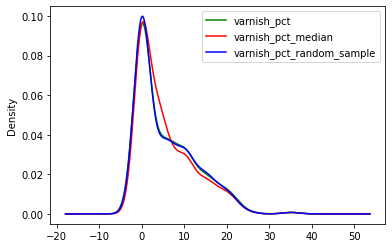

In [296]:
compare_median_and_random_sample(df_best_deviation_imputation, 'varnish_pct')
compare_kde_visualy(df_best_deviation_imputation, 'varnish_pct')

In [297]:
df_best_deviation_imputation.drop(columns=['varnish_pct', 'varnish_pct_median'], inplace=True)

<AxesSubplot:>

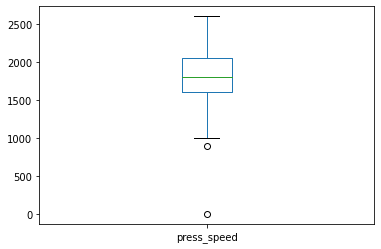

In [298]:
df_best_deviation_imputation['press_speed'].plot(kind='box')

press_speed i press_speed_median razlika standardnih devijacija:  3.6545698581965667
press_speed i press_speed_random_sample razlika standardnih devijacija:  0.3191125802789543


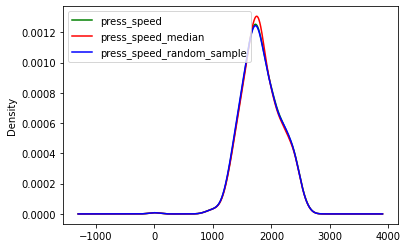

In [299]:
compare_median_and_random_sample(df_best_deviation_imputation, 'press_speed')
compare_kde_visualy(df_best_deviation_imputation, 'press_speed')

In [300]:
df_best_deviation_imputation.drop(columns=['press_speed', 'press_speed_median'], inplace=True)

<AxesSubplot:>

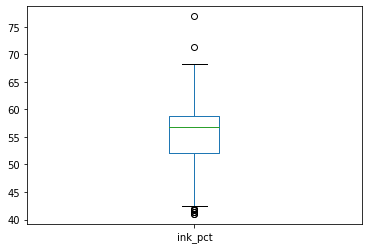

In [301]:
df_best_deviation_imputation['ink_pct'].plot(kind='box')

ink_pct i ink_pct_median razlika standardnih devijacija:  0.29062412878196575
ink_pct i ink_pct_random_sample razlika standardnih devijacija:  0.04006809056663396


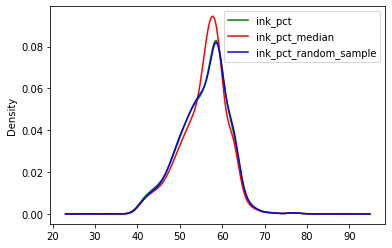

In [302]:
compare_median_and_random_sample(df_best_deviation_imputation, 'ink_pct')
compare_kde_visualy(df_best_deviation_imputation, 'ink_pct')

In [303]:
df_best_deviation_imputation.drop(columns=['ink_pct', 'ink_pct_median'], inplace=True)

<AxesSubplot:>

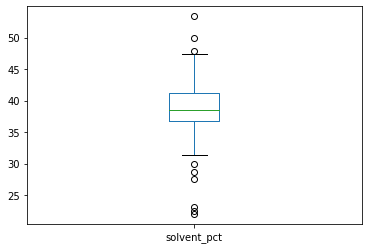

In [304]:
df_best_deviation_imputation['solvent_pct'].plot(kind='box')

solvent_pct i solvent_pct_median razlika standardnih devijacija:  0.1898848251969132
solvent_pct i solvent_pct_random_sample razlika standardnih devijacija:  0.05428866198077431


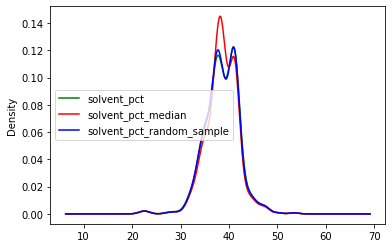

In [305]:
compare_median_and_random_sample(df_best_deviation_imputation, 'solvent_pct')
compare_kde_visualy(df_best_deviation_imputation, 'solvent_pct')

In [306]:
df_best_deviation_imputation.drop(columns=['solvent_pct', 'solvent_pct_median'], inplace=True)

<AxesSubplot:>

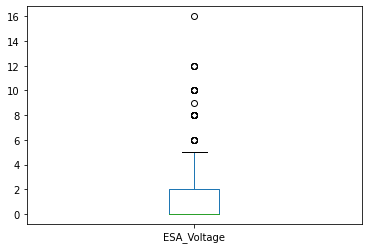

In [307]:
df_best_deviation_imputation['ESA_Voltage'].plot(kind='box')

ESA_Voltage i ESA_Voltage_median razlika standardnih devijacija:  0.10040688940425957
ESA_Voltage i ESA_Voltage_random_sample razlika standardnih devijacija:  0.06358205132886141


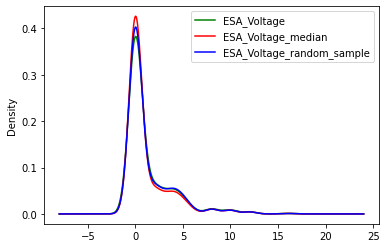

In [308]:
compare_median_and_random_sample(df_best_deviation_imputation, 'ESA_Voltage')
compare_kde_visualy(df_best_deviation_imputation, 'ESA_Voltage')

In [309]:
df_best_deviation_imputation.drop(columns=['ESA_Voltage', 'ESA_Voltage_median'], inplace=True)

<AxesSubplot:>

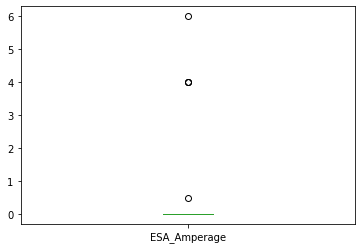

In [310]:
df_best_deviation_imputation['ESA_Amperage'].plot(kind='box')

ESA_Amperage i ESA_Amperage_median razlika standardnih devijacija:  0.021960282209239623
ESA_Amperage i ESA_Amperage_random_sample razlika standardnih devijacija:  0.021960282209239623


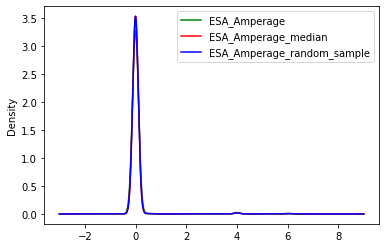

In [311]:
compare_median_and_random_sample(df_best_deviation_imputation, 'ESA_Amperage')
compare_kde_visualy(df_best_deviation_imputation, 'ESA_Amperage')

In [312]:
df_best_deviation_imputation.drop(columns=['ESA_Amperage', 'ESA_Amperage_median'], inplace=True)

<AxesSubplot:>

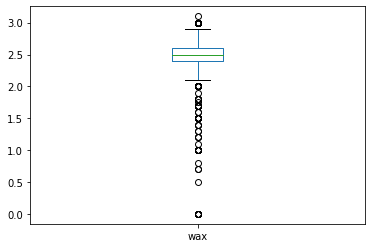

In [313]:
df_best_deviation_imputation['wax'].plot(kind='box')

wax i wax_median razlika standardnih devijacija:  0.003923925367763648
wax i wax_random_sample razlika standardnih devijacija:  0.0012257808111560964


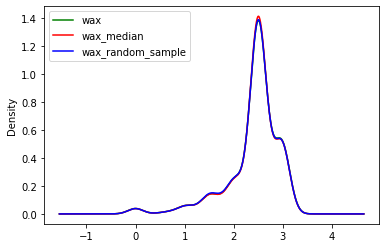

In [314]:
compare_median_and_random_sample(df_best_deviation_imputation, 'wax')
compare_kde_visualy(df_best_deviation_imputation, 'wax')

In [315]:
df_best_deviation_imputation.drop(columns=['wax', 'wax_median'], inplace=True)

<AxesSubplot:>

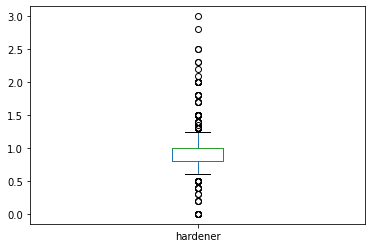

In [316]:
df_best_deviation_imputation['hardener'].plot(kind='box')

hardener i hardener_median razlika standardnih devijacija:  0.0030757309085847617
hardener i hardener_random_sample razlika standardnih devijacija:  0.001147167675849492


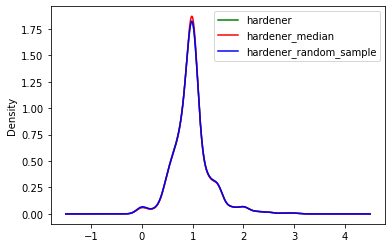

In [317]:
compare_median_and_random_sample(df_best_deviation_imputation, 'hardener')
compare_kde_visualy(df_best_deviation_imputation, 'hardener')

In [318]:
df_best_deviation_imputation.drop(columns=['hardener', 'hardener_median'], inplace=True)

<AxesSubplot:>

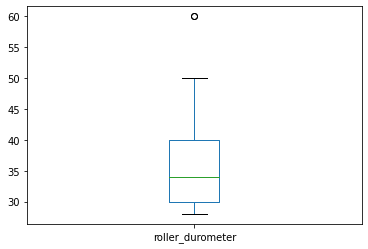

In [319]:
df_best_deviation_imputation['roller_durometer'].plot(kind='box')

roller_durometer i roller_durometer_median razlika standardnih devijacija:  0.23347939577142007
roller_durometer i roller_durometer_random_sample razlika standardnih devijacija:  0.04509795724402377


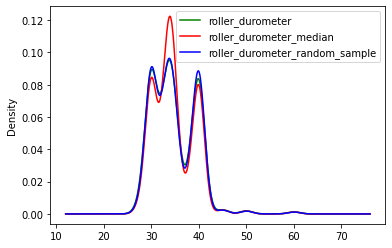

In [320]:
compare_median_and_random_sample(df_best_deviation_imputation, 'roller_durometer')
compare_kde_visualy(df_best_deviation_imputation, 'roller_durometer')

In [321]:
df_best_deviation_imputation.drop(columns=['roller_durometer', 'roller_durometer_median'], inplace=True)

<AxesSubplot:>

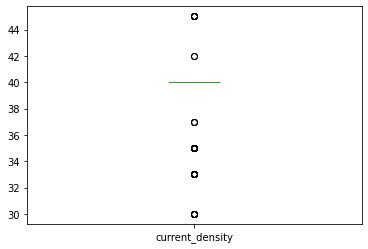

In [322]:
df_best_deviation_imputation['current_density'].plot(kind='box')

current_density i current_density_median razlika standardnih devijacija:  0.016567123395591743
current_density i current_density_random_sample razlika standardnih devijacija:  0.0018845455951885803


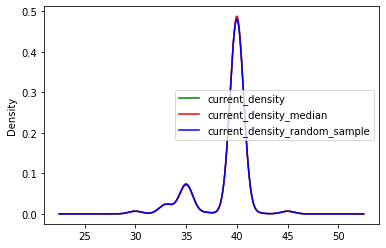

In [323]:
compare_median_and_random_sample(df_best_deviation_imputation, 'current_density')
compare_kde_visualy(df_best_deviation_imputation, 'current_density')

In [324]:
df_best_deviation_imputation.drop(columns=['current_density', 'current_density_median'], inplace=True)

<AxesSubplot:>

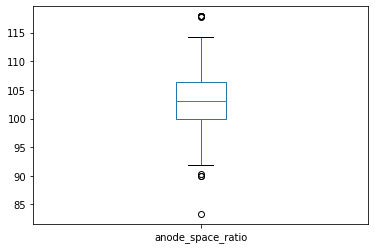

In [325]:
df_best_deviation_imputation['anode_space_ratio'].plot(kind='box')

anode_space_ratio i anode_space_ratio_median razlika standardnih devijacija:  0.04190182714937496
anode_space_ratio i anode_space_ratio_random_sample razlika standardnih devijacija:  0.021056686192296503


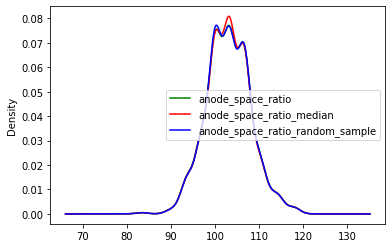

In [326]:
compare_median_and_random_sample(df_best_deviation_imputation, 'anode_space_ratio')
compare_kde_visualy(df_best_deviation_imputation, 'anode_space_ratio')

In [327]:
df_best_deviation_imputation.drop(columns=['anode_space_ratio', 'anode_space_ratio_median'], inplace=True)

<AxesSubplot:>

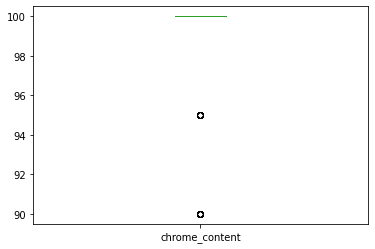

In [328]:
df_best_deviation_imputation['chrome_content'].plot(kind='box')

chrome_content i chrome_content_median razlika standardnih devijacija:  0.008202918446578167
chrome_content i chrome_content_random_sample razlika standardnih devijacija:  0.008202918446578167


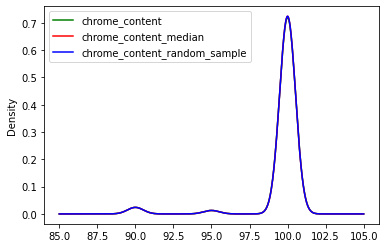

In [329]:
compare_median_and_random_sample(df_best_deviation_imputation, 'chrome_content')
compare_kde_visualy(df_best_deviation_imputation, 'chrome_content')

In [330]:
df_best_deviation_imputation.drop(columns=['chrome_content', 'chrome_content_median'], inplace=True)

In [331]:
# Nakon zamene NaN vrednosti ne bi trebala da se nadje nijedna vrednost u okviru skupa podataka... provera...
df_best_deviation_imputation.isna().sum()

band_type                          0
paper_type_super                   0
paper_type_uncoated                0
cylinder_number_3                  0
cylinder_number_AA1                0
                                  ..
hardener_random_sample             0
roller_durometer_random_sample     0
current_density_random_sample      0
anode_space_ratio_random_sample    0
chrome_content_random_sample       0
Length: 827, dtype: int64

In [332]:
# df_best_deviation_imputation dataframe do sada sadrzi resene probleme pitanja nekonzistentnosti
# i formatiranja, zamenjene NaN vrednosti u kategorickim promenljivama modom, kodirane kategoricke vrednosti
# i zamenjene NaN vrednosti u okviru kontinualnih promenljivih vrednostima koje izazivaju
# najmanju distorziju standardne devijacije

In [333]:
# funkcija koja vrsi skaliranje vrednosti navedenom metodom i zamenu istih u originalni prodledjeni dataframe

def scale_and_replace_values(df, list_of_variables, scale_method):

    for variable in list_of_variables:
        scaled_variable = scale_method.fit_transform(df[[variable]])
        df[variable] = scaled_variable

In [334]:
# hiperparametri koji ce se kombinovati pri unakrsnoj validaciji

from sklearn.ensemble import RandomForestClassifier

decission_tree_parameters = [{'criterion': ['entropy', 'gini'],
                              'max_depth': [10, 20, 30, 40, 50],
                              'random_state': list(range(10, 201, 10))}]

svm_parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                  {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

logistic_regression_parameters = [{'penalty': ['l1', 'l2'],
                                   'C': np.logspace(-4, 4, 20),
                                   'solver': ['liblinear'],
                                   'max_iter': [100, 1000, 2500, 5000]}]

knn_parameters = [{'n_neighbors': list(range(1, 50)), 'metric': [
                   'euclidean', 'manhattan', 'cosine'], 'weights': ['uniform', 'distance']}]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_forest_grid = [{'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}]

 - Izvršiti ugnježđenu unakrsnu validaciju primenom sledećih algoritama mašinskog učenja: **Decission tree, SVM, kNN i Random forest**
 - Unakrsna validacija se vrši nad "osnovnim skupom", odnosno skupom nad kojim su preduzete elementarne transformacije prilikom inicijalnog procesiranja podataka (čišćenje nekonzistentnih i loše formatiranih vrednosti, zamena **NaN** vrednosti kategoričkih atributa najfrekventnijom vrednošću i zamena **NaN** vrednosti kontinualnih atributa srednjom vrednošću)

In [335]:
# udnjezdjena unakrsna validacija nad osnovnim skupom podataka

X_train, X_test, Y_train, Y_test = train_test_split(
    df_basic.drop('band_type', axis='columns'), df_basic['band_type'], test_size=0.2, random_state=0)

# Decission tree

grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=decission_tree_parameters,
                              scoring='accuracy',
                              return_train_score=True,
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_basic_decission_tree_accuracy = grid_search_cv.best_score_
df_basic_decission_tree_best_params = grid_search_cv.best_params_

# kNN

grid_search_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=knn_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_basic_knn_accuracy = grid_search_cv.best_score_
df_basic_knn_best_params = grid_search_cv.best_params_

# Random forest

grid_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=random_forest_grid,
                              scoring='accuracy',
                              n_iter = 100,      
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_basic_random_forest_accuracy = grid_search_cv.best_score_
df_basic_random_forest_best_params = grid_search_cv.best_params_

- Izvršiti ugnježđenu unakrsnu validaciju primenom gorepomenutih algoritama nakon zamene **NaN** vrednosti kontinualnih atributa vrednostima koje unose najmanje promene standardne devijacije

In [336]:
# ugnjezdjena unakrsna validacija za random_sample imputation (neskalirane vrednosti)

X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_deviation_imputation.drop('band_type', axis='columns'), df_best_deviation_imputation['band_type'], test_size=0.2, random_state=0)

# Decission tree

grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=decission_tree_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_best_deviation_decission_tree_accuracy = grid_search_cv.best_score_
df_best_deviation_decission_tree_best_params = grid_search_cv.best_params_

# kNN

grid_search_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=knn_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_best_deviation_knn_accuracy = grid_search_cv.best_score_
df_best_deviation_knn_best_params = grid_search_cv.best_params_

# Random forest

grid_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=random_forest_grid,
                              scoring='accuracy',
                              n_iter = 100,      
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_best_deviation_random_forest_accuracy = grid_search_cv.best_score_
df_best_deviation_random_forest_best_params = grid_search_cv.best_params_

In [337]:
# Skaliranje promenljivih

scale_and_replace_values(
    df_best_deviation_imputation, ['timestamp_random_sample', 'proof_cut_random_sample', 'viscosity_random_sample', 'caliper_random_sample', 'ink_temperature_random_sample', 'humifity_random_sample',
                                   'roughness_random_sample', 'blade_pressure_random_sample', 'varnish_pct_random_sample', 'press_speed_random_sample', 'ink_pct_random_sample', 'solvent_pct_random_sample',
                                   'ESA_Voltage_random_sample', 'ESA_Amperage_random_sample', 'wax_random_sample', 'hardener_random_sample', 'roller_durometer_random_sample', 'current_density_random_sample',
                                   'anode_space_ratio_random_sample', 'chrome_content_random_sample'], MinMaxScaler()) 

In [338]:
# snimanje dataframe-a nakon skaliranja

df_best_deviation_imputation.to_csv(
    'df_best_deviation_imputation_min_max_scaled.csv', index=False)

- Izvršiti ugnježđenu unakrsnu validaciju nakon skaliranja kontinualnih vrednosti

In [339]:
# Nakon skaliranja promenljivih

X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_deviation_imputation.drop('band_type', axis='columns'), df_best_deviation_imputation['band_type'], test_size=0.2, random_state=0)

# Decission tree

grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=decission_tree_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_scaled_min_max_decission_tree_accuracy = grid_search_cv.best_score_
df_scaled_min_max_decission_tree_best_params = grid_search_cv.best_params_

# SVM

grid_search_cv = GridSearchCV(estimator=SVC(),
                              param_grid=svm_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_scaled_min_max_svm_accuracy = grid_search_cv.best_score_
df_scaled_min_max_svm_best_params = grid_search_cv.best_params_

# kNN

grid_search_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=knn_parameters,
                              scoring='accuracy',
                              cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_scaled_min_max_knn_accuracy = grid_search_cv.best_score_
df_scaled_min_max_knn_best_params = grid_search_cv.best_params_

# Random forest

grid_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=random_forest_grid,
                              scoring='accuracy',
                              n_iter = 100,      
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
df_scaled_min_max_random_forest_accuracy = grid_search_cv.best_score_
df_scaled_min_max_random_forest_best_params = grid_search_cv.best_params_

In [340]:
# funkcija koja vrsi PCA test i na osnovu unetog broja najbitnijih komponenti formira novi dataframe...
# ...i vraca ga kao povratnu vrednost

def pca_feature_selection(df, target, how_many_components=10, random_state=0):
    pca_obj = PCA(n_components=how_many_components, random_state=random_state)
    pca_most_important_components = pca_obj.fit_transform(df.drop(target, axis=1))
    # Napravi novi dataframe sa komponentama koje su se najbolje pokazale na testu
    # Najpre imenuj komponente (PC1, PC2, ...)
    new_columns_names = [f"PC{i}" for i in range(1, how_many_components + 1)]
    df_temp = pd.DataFrame(pca_most_important_components, columns=new_columns_names)
    df_temp[target] = df[target]
    return df_temp

In [341]:
# PCA test i zadrzavanje najbitnijih komponenti

df_best_deviation_imputation_and_scaled_pca = pca_feature_selection(df_best_deviation_imputation, 'band_type', 10)
df_best_deviation_imputation_and_scaled_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,band_type
0,-0.510731,-1.404348,-0.336883,0.171697,-0.284252,0.298950,-0.839909,-0.075992,-0.128346,-0.260451,1
1,-0.489614,-1.386032,-0.335414,0.157861,-0.273836,0.293930,-0.838472,-0.062975,-0.147218,-0.237987,0
2,-0.883248,0.779701,-0.223619,-0.402733,0.133174,-0.365993,-0.336525,0.733286,-0.213126,0.233793,0
3,-1.218997,0.577753,-0.508616,0.116144,-0.532750,0.266502,0.118415,-0.343848,0.195265,0.305949,0
4,-0.455855,0.331518,-1.180706,-0.127651,-0.771136,-0.075406,0.629756,0.377836,0.134592,-0.151366,0


In [117]:
# Snimanje dataframe-a nakon zadrzavanja najbitnihih kolona utvrdjenih PCA testom

df_best_deviation_imputation_and_scaled_pca.to_csv(
    'df_best_deviation_imputation_and_scaled_pca.csv', index=False)

df_best_deviation_imputation.shape

(541, 827)

- U svakoj iteraciji for petlje, vrši se povećanje broja najbitnijih komponenti koje treba zadržati u **PCA** testu za 10 (počevši od 10 pa sve do 540 komponenti)
- Za svaki od skupova sa odgovarajućim brojem zadržanih komponenti izvršiti ugnježđenu unakrsnu validaciju
- Nakon izvršenih testova, štampati najbolje rezultate za svaki od testiranih algoritama ponaosob (koliko komponenti nakon **PCA** testa je najbolje zadržati, kao i koji ulazni hiperparametri u algoritam su davali najbolje prosečne tačnosti)

In [118]:
df_pca_decission_tree_accuracy_max = 0
df_pca_decission_tree_best_params_max = ''
df_pca_svm_accuracy_max = 0 
df_pca_svm_best_params_max = ''
df_pca_knn_accuracy_max = 0
df_pca_knn_best_params_max = ''
df_pca_random_forest_accuracy_max = 0
df_pca_random_forest_best_params_max = ''

how_many_features_to_keep_decission_tree_pca = 0
how_many_features_to_keep_svm_pca = 0
how_many_features_to_keep_knn_pca = 0
how_many_features_to_keep_random_forest_pca = 0

for number_of_features in range(10, 541, 10):
    df_best_deviation_imputation_and_scaled_pca = pca_feature_selection(df_best_deviation_imputation, 'band_type', number_of_features)
    # Podesavanje hiperparametara nakon primene PCA testa

    X_train, X_test, Y_train, Y_test = train_test_split(
        df_best_deviation_imputation_and_scaled_pca.drop('band_type', axis='columns'), df_best_deviation_imputation_and_scaled_pca['band_type'], test_size=0.2, random_state=0)

    # Decission tree

    grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=decission_tree_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_pca_decission_tree_accuracy = grid_search_cv.best_score_
    df_pca_decission_tree_best_params = grid_search_cv.best_params_

    # SVM

    grid_search_cv = GridSearchCV(estimator=SVC(),
                                  param_grid=svm_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_pca_svm_accuracy = grid_search_cv.best_score_
    df_pca_svm_best_params = grid_search_cv.best_params_

    # kNN

    grid_search_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                                  param_grid=knn_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)
    
    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_pca_knn_accuracy = grid_search_cv.best_score_
    df_pca_knn_best_params = grid_search_cv.best_params_
    
    # Random forest
    
    grid_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=random_forest_grid,
                              scoring='accuracy',
                              n_iter = 100,      
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_pca_random_forest_accuracy = grid_search_cv.best_score_
    df_pca_random_forest_best_params = grid_search_cv.best_params_
    
    if df_pca_decission_tree_accuracy > df_pca_decission_tree_accuracy_max:
        df_pca_decission_tree_accuracy_max = df_pca_decission_tree_accuracy
        df_pca_decission_tree_best_params_max = df_pca_decission_tree_best_params
        how_many_features_to_keep_decission_tree_pca = number_of_features
        
    if df_pca_svm_accuracy > df_pca_svm_accuracy_max:
        df_pca_svm_accuracy_max = df_pca_svm_accuracy
        df_pca_svm_best_params_max = df_pca_svm_best_params
        how_many_features_to_keep_svm_pca = number_of_features
        
    if df_pca_knn_accuracy > df_pca_knn_accuracy_max:
        df_pca_knn_accuracy_max = df_pca_knn_accuracy
        df_pca_knn_best_params_max = df_pca_knn_best_params
        how_many_features_to_keep_knn_pca = number_of_features
    
    if df_pca_random_forest_accuracy > df_pca_random_forest_accuracy_max:
        df_pca_random_forest_accuracy_max = df_pca_random_forest_accuracy
        df_pca_random_forest_best_params_max = df_pca_random_forest_best_params
        how_many_features_to_keep_random_forest_pca = number_of_features
        
    
    print(f'Nakon primene PCA testa i zadrzanog broja komponenti: {number_of_features}')
    print()
    print('Decission tree accuracy:', df_pca_decission_tree_accuracy)
    print('Decission tree best parameters:', df_pca_decission_tree_best_params)
    print()
    print('SVM accuracy:', df_pca_svm_accuracy)
    print('SVM best parameters:', df_pca_svm_best_params)
    print()
    print('kNN accuracy:', df_pca_knn_accuracy)
    print('kNN best parameters:', df_pca_knn_best_params)
    print()
    print('Random forest accuracy:', df_pca_random_forest_accuracy)
    print('Random forest best parameters:', df_pca_random_forest_best_params)
    print()

print(f'Najbolja kombinacija za decission tree je zadrzati broj komponenti: {how_many_features_to_keep_decission_tree_pca}')
print('Prosecna tacnost za decission tree:', df_pca_decission_tree_accuracy_max)
print('Najbolji hiperparametri za decission tree:', df_pca_decission_tree_best_params_max)
print()
print(f'Najbolja kombinacija za svm je zadrzati broj komponenti: {how_many_features_to_keep_svm_pca}')
print('Prosecna tacnost za svm:', df_pca_svm_accuracy_max)
print('Najbolji hiperparametri za svm:', df_pca_svm_best_params_max)
print()
print(f'Najbolja kombinacija za knn je zadrzati broj komponenti: {how_many_features_to_keep_knn_pca}')
print('Prosecna tacnost za knn:', df_pca_knn_accuracy_max)
print('Najbolji hiperparametri za knn:', df_pca_knn_best_params_max)
print()
print(f'Najbolja kombinacija za random forest je zadrzati broj komponenti: {how_many_features_to_keep_random_forest_pca}')
print('Prosecna tacnost za random forest:', df_pca_random_forest_accuracy_max)
print('Najbolji hiperparametri za knn:', df_pca_random_forest_best_params_max)
print()


Nakon primene PCA testa i zadrzanog broja komponenti: 10

Decission tree accuracy: 0.7176958032611601
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 70}

SVM accuracy: 0.7454691259021653
SVM best parameters: {'C': 100, 'gamma': 0.4, 'kernel': 'rbf'}

kNN accuracy: 0.7477679764768779
kNN best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Random forest accuracy: 0.7709435979684576
Random forest best parameters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}

Nakon primene PCA testa i zadrzanog broja komponenti: 20

Decission tree accuracy: 0.7291365944934509
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 100}

SVM accuracy: 0.7595028067361669
SVM best parameters: {'C': 1000, 'gamma': 0.4, 'kernel': 'rbf'}

kNN accuracy: 0.7641005078855921
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 3

Nakon primene PCA testa i zadrzanog broja komponenti: 150

Decission tree accuracy: 0.7154236835070836
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 90}

SVM accuracy: 0.8241913926757551
SVM best parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

kNN accuracy: 0.7941192194600375
kNN best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.8080994386527667
Random forest best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}

Nakon primene PCA testa i zadrzanog broja komponenti: 160

Decission tree accuracy: 0.7453622026196205
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 10, 'random_state': 90}

SVM accuracy: 0.814915797914996
SVM best parameters: {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

kNN accuracy: 0.7895482491312483
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 19, '

Nakon primene PCA testa i zadrzanog broja komponenti: 290

Decission tree accuracy: 0.7083400160384923
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 10, 'random_state': 40}

SVM accuracy: 0.7964715316760225
SVM best parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

kNN accuracy: 0.7686714782143812
kNN best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.7685645549318364
Random forest best parameters: {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}

Nakon primene PCA testa i zadrzanog broja komponenti: 300

Decission tree accuracy: 0.7037690457097032
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 80}

SVM accuracy: 0.8010157711841753
SVM best parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

kNN accuracy: 0.7639668537824111
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 1,

Nakon primene PCA testa i zadrzanog broja komponenti: 430

Decission tree accuracy: 0.7085271317829458
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 10, 'random_state': 160}

SVM accuracy: 0.7964448008553864
SVM best parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

kNN accuracy: 0.7732959101844428
kNN best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.7500400962309544
Random forest best parameters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

Nakon primene PCA testa i zadrzanog broja komponenti: 440

Decission tree accuracy: 0.7106121357925689
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 100}

SVM accuracy: 0.7964180700347501
SVM best parameters: {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}

kNN accuracy: 0.7755947607591553
kNN best parameters: {'metric': 'euclidean', 'n_neighbor

In [110]:
# univariate selekcija komponenti (promenljivih)... 
# funkcija testira promenljive prosledjenog dataframe-a na osnovu prosledjenog statistickog testa (chi2) podrazumevano...
# ... bira najuticajnije komponente u odnosu na odredisnu promenljivu...
# kreira novi dataframe na osnovu najbitnijih komponenti i vraca novoformirani dataframe kao povratnu vrednost

def univariate_feature_selection_k_best(df, target, how_many_features, stat_test=chi2):
    select_k_best_features = SelectKBest(score_func=stat_test, k=how_many_features)
    best_features = select_k_best_features.fit(df.drop('band_type', axis=1), df['band_type'])
    columns = df.drop('band_type', axis=1).columns
    best_features_df = pd.DataFrame({'columns': columns, 'scores': best_features.scores_})
    df_features_chi2_test = df[best_features_df.nlargest(how_many_features, 'scores')['columns']]
    df_features_chi2_test[target] = df[target].values
    return df_features_chi2_test

In [120]:
df_best_deviation_imputation_chi2_test = univariate_feature_selection_k_best(df_best_deviation_imputation, 'band_type', how_many_features=10)
df_best_deviation_imputation_chi2_test.head()

,type_on_cylinder_yes,paper_type_super,paper_type_super.1,press_815,customer_kmart,ink_type_cover,timestamp_random_sample,customer_WOOLWORTH,press_type_WoodHoe70,press_type_Motter70,band_type
0,0,0,0,0,0,0,0.240364,0,0,0,1
1,0,0,0,0,0,0,0.240388,0,0,0,0
2,0,0,0,1,0,0,0.240265,0,1,0,0
3,0,0,0,0,0,0,0.240265,0,1,0,0
4,0,0,0,0,0,0,0.240438,0,1,0,0


- U svakoj iteraciji for petlje povećavati broj najbitnijih komponenti koje treba zadržati za 10 (počevši od 10 pa sve do 540 komponenti)
- Nakom izvršenog testa u kome se traže najbitnije komponente upotrebom **chi2** testa, iste zadržati uključujući i odredišnu komponentu i za takav skup izvršiti ugnježđene unakrsne validacije u cilju ispitivanja koji je algoritam sa odgovarajućom kombinacijom hiperparametara najefikasnije upotrebiti za treniranje konačnog modela koji će vršiti predikciju


In [152]:
df_chi2_decission_tree_accuracy_max = 0
df_chi2_decission_tree_best_params_max = ''
df_chi2_svm_accuracy_max = 0 
df_chi2_svm_best_params_max = ''
df_chi2_knn_accuracy_max = 0
df_chi2_knn_best_params_max = ''
df_chi2_random_forest_accuracy_max = 0
df_chi2_random_forest_best_params_max = ''

how_many_features_to_keep_decission_tree_chi2 = 0
how_many_features_to_keep_svm_chi2 = 0
how_many_features_to_keep_knn_chi2 = 0
how_many_features_to_keep_random_forest_chi2 = 0

for number_of_features in range(10, 541, 10):
    df_best_deviation_imputation_chi2_test = univariate_feature_selection_k_best(df_best_deviation_imputation, 'band_type', how_many_features=number_of_features)
    
    X_train, X_test, Y_train, Y_test = train_test_split(
        df_best_deviation_imputation_chi2_test.drop('band_type', axis='columns'), 
        df_best_deviation_imputation_chi2_test['band_type'], test_size=0.2, random_state=0)

    # Decission Tree

    grid_search_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=decission_tree_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0),
                                  n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_chi2_decission_tree_accuracy = grid_search_cv.best_score_
    df_chi2_decission_tree_best_params = grid_search_cv.best_params_

     # SVM

    grid_search_cv = GridSearchCV(estimator=SVC(),
                                  param_grid=svm_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_chi2_svm_accuracy = grid_search_cv.best_score_
    df_chi2_svm_best_params = grid_search_cv.best_params_

    # kNN

    grid_search_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                                  param_grid=knn_parameters,
                                  scoring='accuracy',
                                  cv=StratifiedKFold(shuffle=True, random_state=0), n_jobs=-1)
    
    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_chi2_knn_accuracy = grid_search_cv.best_score_
    df_chi2_knn_best_params = grid_search_cv.best_params_
    
    # Random forest
    
    grid_search_cv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=random_forest_grid,
                              scoring='accuracy',
                              n_iter = 100,      
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

    grid_search_cv = grid_search_cv.fit(X_train, Y_train)
    df_chi2_random_forest_accuracy = grid_search_cv.best_score_
    df_chi2_random_forest_best_params = grid_search_cv.best_params_
    
    
    if df_chi2_decission_tree_accuracy > df_chi2_decission_tree_accuracy_max:
        df_chi2_decission_tree_accuracy_max = df_pca_decission_tree_accuracy
        df_chi2_svm_best_params_max = df_chi2_svm_best_params
        how_many_features_to_keep_decission_tree_chi2 = number_of_features
        
    if df_chi2_svm_accuracy > df_chi2_svm_accuracy_max:
        df_chi2_svm_accuracy_max = df_chi2_svm_accuracy
        df_chi2_svm_best_params_max = df_chi2_svm_best_params
        how_many_features_to_keep_svm_chi2 = number_of_features
        
    if df_chi2_knn_accuracy > df_chi2_knn_accuracy_max:
        df_chi2_knn_accuracy_max = df_chi2_knn_accuracy
        df_chi2_knn_best_params_max = df_chi2_knn_best_params
        how_many_features_to_keep_knn_chi2 = number_of_features     
        
    if df_chi2_random_forest_accuracy > df_chi2_random_forest_accuracy_max:
        df_chi2_random_forest_accuracy_max = df_chi2_random_forest_accuracy
        df_chi2_random_forest_best_params_max = df_chi2_random_forest_best_params
        how_many_features_to_keep_random_forest_chi2 = number_of_features
        
    print(f'Nakon primene chi2 testa i zadrzanog broja komponenti: {number_of_features}')
    print()
    print('Decission tree accuracy:', df_chi2_decission_tree_accuracy)
    print('Decission tree best parameters:', df_chi2_decission_tree_best_params)
    print()
    print('SVM accuracy:', df_chi2_svm_accuracy)
    print('SVM best parameters:', df_chi2_svm_best_params)
    print()
    print('kNN accuracy:', df_chi2_knn_accuracy)
    print('kNN best parameters:', df_chi2_knn_best_params)
    print()  
    print('Random forest accuracy:', df_chi2_random_forest_accuracy)
    print('Random forest best parameters:', df_chi2_random_forest_best_params)
    print()
    
print(f'Najbolja kombinacija za decission tree je zadrzati broj komponenti: {how_many_features_to_keep_decission_tree_chi2}')
print('Prosecna tacnost za decission tree:', df_chi2_decission_tree_accuracy_max)
print('Najbolji hiperparametri za decission tree:', df_chi2_svm_best_params_max)
print()
print(f'Najbolja kombinacija za svm je zadrzati broj komponenti: {how_many_features_to_keep_svm_chi2}')
print('Prosecna tacnost za svm:', df_chi2_svm_accuracy_max)
print('Najbolji hiperparametri za svm:', df_chi2_svm_best_params_max)
print()
print(f'Najbolja kombinacija za knn je zadrzati broj komponenti: {how_many_features_to_keep_knn_chi2}')
print('Prosecna tacnost za knn:', df_chi2_knn_accuracy_max)
print('Najbolji hiperparametri za knn:', df_chi2_knn_best_params_max)
print()
print(f'Najbolja kombinacija za random forest je zadrzati broj komponenti: {how_many_features_to_keep_random_forest_chi2}')
print('Prosecna tacnost za random forest:', df_chi2_random_forest_accuracy_max)
print('Najbolji hiperparametri za random forest:', df_chi2_random_forest_best_params_max)
print()
    

Nakon primene chi2 testa i zadrzanog broja komponenti: 10

Decission tree accuracy: 0.7685645549318364
Decission tree best parameters: {'criterion': 'entropy', 'max_depth': 30, 'random_state': 10}

SVM accuracy: 0.7106923282544774
SVM best parameters: {'C': 10, 'gamma': 0.7, 'kernel': 'rbf'}

kNN accuracy: 0.7823576583801123
kNN best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Random forest accuracy: 0.7638866613205025
Random forest best parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Nakon primene chi2 testa i zadrzanog broja komponenti: 20

Decission tree accuracy: 0.8034750066827051
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 170}

SVM accuracy: 0.7480352846832398
SVM best parameters: {'C': 10, 'kernel': 'linear'}

kNN accuracy: 0.7709703287890939
kNN best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weig

Nakon primene chi2 testa i zadrzanog broja komponenti: 150

Decission tree accuracy: 0.7895482491312483
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 40}

SVM accuracy: 0.7825715049452019
SVM best parameters: {'C': 10, 'kernel': 'linear'}

kNN accuracy: 0.7570168404170008
kNN best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.7873563218390804
Random forest best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

Nakon primene chi2 testa i zadrzanog broja komponenti: 160

Decission tree accuracy: 0.7895215183106121
Decission tree best parameters: {'criterion': 'entropy', 'max_depth': 40, 'random_state': 200}

SVM accuracy: 0.7988773055332798
SVM best parameters: {'C': 1, 'kernel': 'linear'}

kNN accuracy: 0.7662924351777599
kNN best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'un

Nakon primene chi2 testa i zadrzanog broja komponenti: 290

Decission tree accuracy: 0.8079925153702219
Decission tree best parameters: {'criterion': 'entropy', 'max_depth': 20, 'random_state': 200}

SVM accuracy: 0.8219192729216787
SVM best parameters: {'C': 1, 'kernel': 'linear'}

kNN accuracy: 0.7615610799251538
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.8081796311146752
Random forest best parameters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}

Nakon primene chi2 testa i zadrzanog broja komponenti: 300

Decission tree accuracy: 0.8104517508687517
Decission tree best parameters: {'criterion': 'entropy', 'max_depth': 20, 'random_state': 20}

SVM accuracy: 0.8219192729216787
SVM best parameters: {'C': 1, 'kernel': 'linear'}

kNN accuracy: 0.782464581662657
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform

Nakon primene chi2 testa i zadrzanog broja komponenti: 430

Decission tree accuracy: 0.8149692595562682
Decission tree best parameters: {'criterion': 'entropy', 'max_depth': 30, 'random_state': 90}

SVM accuracy: 0.8288425554664528
SVM best parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

kNN accuracy: 0.7290831328521785
kNN best parameters: {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}

Random forest accuracy: 0.7895482491312483
Random forest best parameters: {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

Nakon primene chi2 testa i zadrzanog broja komponenti: 440

Decission tree accuracy: 0.8080192461908581
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 140}

SVM accuracy: 0.8358192996524993
SVM best parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

kNN accuracy: 0.7267842822774659
kNN best parameters: {'metric': 'euclidean', 'n_neighbo

Nakon unakrsnih validacija algoritama mašinskog učenja, za svaku varijantu preduzimanih transformacija nad skupom ponaosob i sa raznim kombinacijama ulaznih hiperparametara, štampati optimalna pronađena rešenja

In [153]:
print('REZULTATI')
print()
print('Osnovna varijanta skupa podataka:')
print()
print('Decission tree accuracy:', df_basic_decission_tree_accuracy)
print('Decission tree best parameters:', df_basic_decission_tree_best_params)
print()
print('kNN accuracy:', df_basic_knn_accuracy)
print('kNN best parameters', df_basic_knn_best_params)
print()
print('Random forest accuracy:', df_basic_random_forest_accuracy)
print('Random forest best parameters', df_basic_random_forest_best_params)
print()
print('Nakon primene metode zamene NaN vrednosti u kontinualnim promenljivama sa najmanjom promenom devijacije:')
print()
print('Decission tree accuracy:', df_best_deviation_decission_tree_accuracy)
print('Decission tree best parameters:', df_best_deviation_decission_tree_best_params)
print()
print('kNN accuracy:', df_best_deviation_knn_accuracy)
print('kNN best parameters:', df_best_deviation_knn_best_params)
print()
print('Random forest accuracy:', df_best_deviation_random_forest_accuracy)
print('Random forest best parameters:', df_best_deviation_random_forest_best_params)
print()
print('Nakon skaliranja promenljivih:')
print()
print('Decission tree accuracy:', df_scaled_min_max_decission_tree_accuracy)
print('Decission tree best parameters:', df_scaled_min_max_decission_tree_best_params)
print()
print('SVM accuracy:', df_scaled_min_max_svm_accuracy)
print('SVM best parameters:', df_scaled_min_max_svm_best_params)
print()
print('kNN accuracy:', df_scaled_min_max_knn_accuracy)
print('kNN best parameters:', df_scaled_min_max_knn_best_params)
print()
print('Random forest accuracy:', df_scaled_min_max_random_forest_accuracy)
print('Random forest best parameters:', df_scaled_min_max_random_forest_best_params)
print()
print('Nakon primene PCA testa i zadrzavanja najbitnijih komponenti:')
print()
print(f'Najbolja kombinacija za decission tree je zadrzati broj komponenti: {how_many_features_to_keep_decission_tree_pca}')
print('Prosecna tacnost za decission tree:', df_pca_decission_tree_accuracy_max)
print('Najbolji hiperparametri za decission tree:', df_pca_decission_tree_best_params_max)
print()
print(f'Najbolja kombinacija za svm je zadrzati broj komponenti: {how_many_features_to_keep_svm_pca}')
print('Prosecna tacnost za svm:', df_pca_svm_accuracy_max)
print('Najbolji hiperparametri za svm:', df_pca_svm_best_params_max)
print()
print(f'Najbolja kombinacija za knn je zadrzati broj komponenti: {how_many_features_to_keep_knn_pca}')
print('Prosecna tacnost za knn:', df_pca_knn_accuracy_max)
print('Najbolji hiperparametri za knn:', df_pca_knn_best_params_max)
print()
print(f'Najbolja kombinacija za random forest je zadrzati broj komponenti: {how_many_features_to_keep_random_forest_pca}')
print('Prosecna tacnost za random forest:', df_pca_random_forest_accuracy_max)
print('Najbolji hiperparametri za knn:', df_pca_random_forest_best_params_max)
print()
print('Nakon primene chi2 testa i zadrzavanja najbitnijih komponenti:')
print()
print(f'Najbolja kombinacija za decission tree je zadrzati broj komponenti: {how_many_features_to_keep_decission_tree_chi2}')
print('Prosecna tacnost za decission tree:', df_chi2_decission_tree_accuracy_max)
print('Najbolji hiperparametri za decission tree:', df_chi2_svm_best_params_max)
print()
print(f'Najbolja kombinacija za svm je zadrzati broj komponenti: {how_many_features_to_keep_svm_chi2}')
print('Prosecna tacnost za svm:', df_chi2_svm_accuracy_max)
print('Najbolji hiperparametri za svm:', df_chi2_svm_best_params_max)
print()
print(f'Najbolja kombinacija za knn je zadrzati broj komponenti: {how_many_features_to_keep_knn_chi2}')
print('Prosecna tacnost za knn:', df_chi2_knn_accuracy_max)
print('Najbolji hiperparametri za knn:', df_chi2_knn_best_params_max)
print()
print(f'Najbolja kombinacija za random forest je zadrzati broj komponenti: {how_many_features_to_keep_random_forest_chi2}')
print('Prosecna tacnost za random forest:', df_chi2_random_forest_accuracy_max)
print('Najbolji hiperparametri za random forest:', df_chi2_random_forest_best_params_max)
print()

REZULTATI

Osnovna varijanta skupa podataka:

Decission tree accuracy: 0.7640737770649559
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 160}

kNN accuracy: 0.7524458700882117
kNN best parameters {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

Random forest accuracy: 0.8125367548783748
Random forest best parameters {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Nakon primene metode zamene NaN vrednosti u kontinualnim promenljivama sa najmanjom promenom devijacije:

Decission tree accuracy: 0.7314889067094359
Decission tree best parameters: {'criterion': 'gini', 'max_depth': 20, 'random_state': 180}

kNN accuracy: 0.7408714247527399
kNN best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

Random forest accuracy: 0.8218123496391339
Random forest best parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_

- Grafički i tabelarno prikazati rezultate svih primenjenih algoritama mašinskog učenja pri unakrsnoj validaciji 
- Testovi unakrsne validacije su pokazali da su obučavani modeli imali najveću prosečnu tačnost kada se nad skupom podataka izvrši **chi2** test i zadrži **490** najbitnijih komponenti, a individualni modeli obučavaju koristeći **SVM** klasifikator sa sledećim vrednostima ulaznih hiperparametara: **C=10, gamma=0.5, kernel='rbf'**

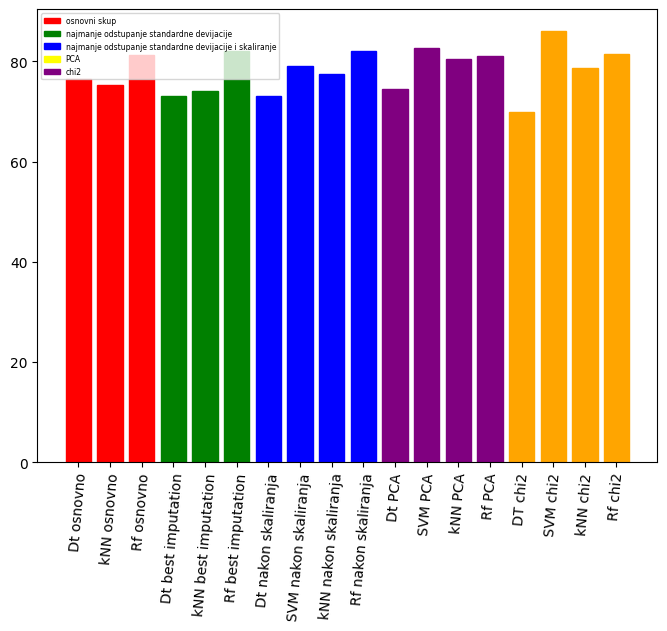

In [126]:
import matplotlib.patches as matpatches
from matplotlib.pyplot import figure

red_patch = matpatches.Patch(color='red', label='osnovni skup')
green_patch = matpatches.Patch(color='green', label='najmanje odstupanje standardne devijacije')
blue_patch = matpatches.Patch(color='blue', label='najmanje odstupanje standardne devijacije i skaliranje')
yellow_patch = matpatches.Patch(color='yellow', label='PCA')
purple_patch = matpatches.Patch(color='purple', label='chi2')


figure(num=None, figsize=(8, 6), dpi=100)
plt.xticks(rotation=85)
plt.legend(handles=[red_patch, green_patch, blue_patch, yellow_patch, purple_patch], prop={'size': 5.5}, loc='upper left')

X = ['Dt osnovno', 
     'kNN osnovno', 
     'Rf osnovno',
     'Dt best imputation', 
     'kNN best imputation', 
     'Rf best imputation',
     'Dt nakon skaliranja', 
     'SVM nakon skaliranja', 
     'kNN nakon skaliranja', 
     'Rf nakon skaliranja',
     'Dt PCA', 
     'SVM PCA',  
     'kNN PCA',
     'Rf PCA', 
     'DT chi2',  
     'SVM chi2',  
     'kNN chi2', 
     'Rf chi2']

height = [df_basic_decission_tree_accuracy,
          df_basic_knn_accuracy,
          df_basic_random_forest_accuracy,
          df_best_deviation_decission_tree_accuracy,
          df_best_deviation_knn_accuracy,
          df_best_deviation_random_forest_accuracy,
          df_scaled_min_max_decission_tree_accuracy,
          df_scaled_min_max_svm_accuracy,
          df_scaled_min_max_knn_accuracy,
          df_scaled_min_max_random_forest_accuracy,
          df_pca_decission_tree_accuracy_max,
          df_pca_svm_accuracy_max,
          df_pca_knn_accuracy_max,
          df_pca_random_forest_accuracy_max,
          df_chi2_decission_tree_accuracy_max,
          df_chi2_svm_accuracy_max,
          df_chi2_knn_accuracy_max,
          df_chi2_random_forest_accuracy_max]

for i in range(0, len(height)):
    height[i] *= 100
# # height
    
bar_chart = plt.bar(X, height)

bar_chart[0].set_color('red')
bar_chart[1].set_color('red')
bar_chart[2].set_color('red')
bar_chart[3].set_color('green')
bar_chart[4].set_color('green')
bar_chart[5].set_color('green')
bar_chart[6].set_color('blue')
bar_chart[7].set_color('blue')
bar_chart[8].set_color('blue')
bar_chart[9].set_color('blue')
bar_chart[10].set_color('purple')
bar_chart[11].set_color('purple')
bar_chart[12].set_color('purple')
bar_chart[13].set_color('purple')
bar_chart[14].set_color('orange')
bar_chart[15].set_color('orange')
bar_chart[16].set_color('orange')
bar_chart[17].set_color('orange')

|                 |     Decission tree     |        SVM          |          kNN          |       Random forest      | 
|:----------------|:----------------------:|:-------------------:|:---------------------:|:------------------------:|
|Osnovna varijanta| 0.7640737770649559     |        ***          |   0.7524458700882117  |    0.8125367548783748    |  
|Najmanja promena devijacije| 0.7314889067094359 | *** | 0.7408714247527399 | 0.8218123496391339 |
|Nakon skaliranja | 0.7314621758887998 | 0.7917936380646886 | 0.7754878374766105 | 0.8218123496391339 |
| PCA (broj komponenti) | 0.7453622026196205 (160) | 0.8265437048917402 (180) | 0.8056402031542369 (190) | 0.810344827586207 (60) |
| chi2 (broj komponenti) | 0.6992782678428228 (540) | **0.8611868484362469** (490) | 0.7871157444533547 (310) | 0.8150761828388132 (250) |

- **RandomForestClassifier** iz **sklearn** biblioteke obučava ansambl stabala, međutim ograničava odabir instanci koje će se upotrebljavati za obučavanje individualnih modela u ansamblu na **bagging** tehnike, kao i upotrebu stabla odluke kao algoritma mašinskog učenja koji će se koristiti za obučavanje individualnih modela
- Interesantno bi bilo ispitati da li će se povećati prosečan rezultat tačnosti modela pri unakrsnoj validaciji kada se zadrži broj komponenti u skupu koji je davao najbolje rezultate (**490** komponenti nakon **chi2** testa), a kao algoritam mašinskog učenja upotrebi onaj algoritam koji je davao najbolje prosečne rezultate tačnosti prilikom treniranja individualnih modela (**SVM sa C=10, gamma=0.5, kernel='rbf'**)
- Kao metod odabira instanci koje će se koristiti pri obučavanju individualnih modela upotrebiti neki od **boosting** metoda (npr. **ada boost**)
- Nakon izvršenog testa, možemo videti da je prosečna tačnost koju daje ansambl modela pri unakrsnoj validaciji **0.8405239240844693**, što nije veća vrednost tačnosti od **0.8611868484362469**, koju daje obučavanje individualnih modela upotrebom **SVM** algoritma 

In [151]:
df_best_deviation_imputation_chi2_test = univariate_feature_selection_k_best(df_best_deviation_imputation, 'band_type', how_many_features=490)

X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_deviation_imputation_chi2_test.drop('band_type', axis='columns'), 
    df_best_deviation_imputation_chi2_test['band_type'], test_size=0.2, random_state=0)

param_grid = [{'n_estimators': list(range(2, 101)),
               'base_estimator': [SVC(probability=True, C=10, gamma=0.5, kernel='rbf')],
               'random_state': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
             }]
grid_search_cv = GridSearchCV(estimator=AdaBoostClassifier(),
                              param_grid=param_grid,
                              scoring='accuracy',
                              return_train_score=True,
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
print('Accuracy:', grid_search_cv.best_score_)
print('Best hyperparameters:', grid_search_cv.best_params_)


Accuracy: 0.8405239240844693
Best hyperparameters: {'base_estimator': SVC(C=10, gamma=0.5, probability=True), 'n_estimators': 2, 'random_state': 700}


- Nakon **ada boost** metoda, korisno bi bilo upotrebiti i **bagging** metodu odabira instanci, koristeći SVM algoritam sa gorenavedenim hiperparametrima koji je već korišćen pri ada boost-u za treniranje individualnih modela u ansamblu
- Nakon izvršenog testa unakrsne validacije, možemo da vidimo da je prosečna tačnost skočila na **0.8774391873830526**

In [150]:
from sklearn.ensemble import BaggingClassifier

param_grid = [{'n_estimators': list(range(2, 101)),
               'base_estimator': [SVC(probability=True, C=10, gamma=0.5, kernel='rbf')],
               'random_state': [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
             }]

grid_search_cv = GridSearchCV(estimator=BaggingClassifier(),
                              param_grid=param_grid,
                              scoring='accuracy',
                              return_train_score=True,
                              cv=StratifiedKFold(shuffle=True, random_state=0),
                              n_jobs=-1)

grid_search_cv = grid_search_cv.fit(X_train, Y_train)
print('Accuracy:', grid_search_cv.best_score_)
print('Best hyperparameters:', grid_search_cv.best_params_)

Accuracy: 0.8774391873830526
Best hyperparameters: {'base_estimator': SVC(C=10, gamma=0.5, probability=True), 'n_estimators': 38, 'random_state': 400}


- Obučavanje ansambla modela kompletnim trening podacima koji su se koristili prilikom unakrsne validacije korišćenjem **BaggingClassifier** algoritma i **SVM** algoritma sa hiperparametrima koji je trenirao ansambl modela sa najboljim rezultatima
- Interesantno bi bilo pogledati ostale metrike performansi koje se odnose na individualne performanse svake od klasa (**recall** i **precision** pre svega) nakon predikcije vrednosti klasnog atributa instanci koje su ostavljene za testiranje

Matrica konfuzije:



Text(0.5, 1.0, 'Matrica konfuzije')

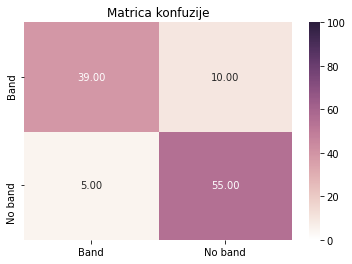

In [176]:
df_best_deviation_imputation_chi2_test = univariate_feature_selection_k_best(df_best_deviation_imputation, 'band_type', how_many_features=490)

X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_deviation_imputation_chi2_test.drop('band_type', axis='columns'), 
    df_best_deviation_imputation_chi2_test['band_type'], test_size=0.2, random_state=0)

base_estimator = SVC(C=10, gamma=0.5, probability=True)
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=38, random_state=400)
bagging_classifier.fit(X_train, Y_train)
bagging_classifier_predicted = bagging_classifier.predict(X_test)
bagging_classifier_confusion_matrix = confusion_matrix(Y_test, bagging_classifier_predicted)
bagging_classifier_classification_report = classification_report(Y_test, bagging_classifier_predicted)

print('Matrica konfuzije:')
print()

df_bagging_classifier_confusion_matrix = pd.DataFrame(bagging_classifier_confusion_matrix, index=['No band', 'Band'], columns=['No band', 'Band'])

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_bagging_classifier_confusion_matrix, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()
res.invert_xaxis()

plt.title('Matrica konfuzije')

In [168]:
print('Kompletan izvestaj nakon predikcije:')
print()
print(bagging_classifier_classification_report)

Kompletan izvestaj nakon predikcije:

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        60
           1       0.89      0.80      0.84        49

    accuracy                           0.86       109
   macro avg       0.87      0.86      0.86       109
weighted avg       0.86      0.86      0.86       109



- Obučavanje modela upotrebom SVM algoritma sa hiperparametrima koji su davali individualno najbolje rešenje 
- Izvršiti predikciju vrednosti klasnog atributa instanci koje su ostavljene za testiranje
- Uporediti mere performansi treniranog modela sa rezultatima ansambla modela obučavanih **BaggingClassifier**-om  

Matrica konfuzije:



Text(0.5, 1.0, 'Matrica konfuzije')

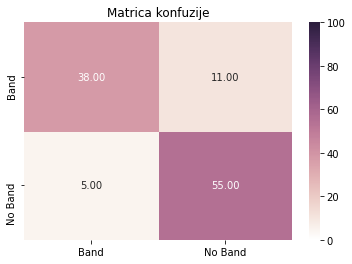

In [114]:
df_best_deviation_imputation_chi2_test = univariate_feature_selection_k_best(df_best_deviation_imputation, 'band_type', how_many_features=490)

X_train, X_test, Y_train, Y_test = train_test_split(
    df_best_deviation_imputation_chi2_test.drop('band_type', axis='columns'), 
    df_best_deviation_imputation_chi2_test['band_type'], test_size=0.2, random_state=0)

svm_classifier = SVC(C=10, gamma=0.5, kernel='rbf')
svm_classifier.fit(X_train, Y_train)
svm_classifier_predicted = svm_classifier.predict(X_test)
svm_classifier_confusion_matrix = confusion_matrix(Y_test, svm_classifier_predicted)
svm_classifier_classification_report = classification_report(Y_test, svm_classifier_predicted)

print('Matrica konfuzije:')
print()

df_svm_classifier_confusion_matrix = pd.DataFrame(svm_classifier_confusion_matrix, index=['No Band', 'Band'], columns=['No Band', 'Band'])

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_svm_classifier_confusion_matrix, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()
res.invert_xaxis()

plt.title('Matrica konfuzije')


In [115]:
print('Kompletan izvestaj nakon predikcije:')
print()
print(svm_classifier_classification_report)

Kompletan izvestaj nakon predikcije:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.88      0.78      0.83        49

    accuracy                           0.85       109
   macro avg       0.86      0.85      0.85       109
weighted avg       0.86      0.85      0.85       109



Na kraju, obučiti konačni model koji će vršiti predikciju nepoznate vrednosti klasnog atributa upotrebom algoritma koji je prilikom testiranja (unakrsne validacije) davao najbolje rezultate: **BaggingClassifier** za odabir instanci kojima će se obučavati modeli u ansamblu, a za obučavanje individualnih modela u ansamblu koristiti **SVM** algoritam sa ulaznim hiperparametrima: **C=10, gamma=0.5, kernel='rbf'**.

In [172]:
# treniranje konacnog modela

X = df_best_deviation_imputation_chi2_test.drop('band_type', axis=1)
Y = df_best_deviation_imputation_chi2_test['band_type']
final_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=38, random_state=400)
final_model.fit(X, Y)

BaggingClassifier(base_estimator=SVC(C=10, gamma=0.5, probability=True),
                  n_estimators=38, random_state=400)

In [175]:
# snimanje modela

import joblib

filename = 'final_model.joblib.pkl'
joblib.dump(final_model, filename, compress=9)

['final_model.joblib.pkl']